### Importing Libaries ###

In [104]:
#Library imports
import re
import os
import time
import math
import random
import itertools
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from pylab import rcParams
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import FunctionTransformer
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

#Notebook arguments
%matplotlib inline

# Importing Data

In [245]:
vix_model_data = pd.read_csv("vix.csv")

In [246]:
vix_model_data.head()

,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume
0,0,2010-06-23,26.930000,28.549999,26.540001,26.910000,26.910000,0
1,1,2010-06-24,27.610001,30.270000,27.530001,29.740000,29.740000,0
2,2,2010-06-25,29.639999,30.410000,28.070000,28.530001,28.530001,0
3,3,2010-06-28,29.200001,29.900000,28.469999,29.000000,29.000000,0
4,4,2010-06-29,31.219999,35.389999,31.219999,34.130001,34.130001,0


In [247]:
vix_model_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2518 entries, 0 to 2517
Data columns (total 8 columns):
Unnamed: 0    2518 non-null int64
Date          2518 non-null object
Open          2518 non-null float64
High          2518 non-null float64
Low           2518 non-null float64
Close         2518 non-null float64
Adj Close     2518 non-null float64
Volume        2518 non-null int64
dtypes: float64(5), int64(2), object(1)
memory usage: 157.5+ KB


In [248]:
# Dropping columns Open, High, Low, Close and Volume 
columns_not_reqd = ['Unnamed: 0','Open','High','Low','Close','Volume']
vix_model_data.drop(columns=columns_not_reqd,inplace=True)
vix_model_data.head()

,Date,Adj Close
0,2010-06-23,26.910000
1,2010-06-24,29.740000
2,2010-06-25,28.530001
3,2010-06-28,29.000000
4,2010-06-29,34.130001


In [255]:
vix_model_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2518 entries, 0 to 2517
Data columns (total 2 columns):
Date         2518 non-null object
Adj Close    2518 non-null float64
dtypes: float64(1), object(1)
memory usage: 39.5+ KB


In [257]:
vix_model_data["Date"] = pd.to_datetime(vix_model_data["Date"])


In [259]:
vix_model_data.set_index('Date', inplace=True)

In [260]:
vix_model_data.head()

,Adj Close
Date,
2010-06-23,26.910000
2010-06-24,29.740000
2010-06-25,28.530001
2010-06-28,29.000000
2010-06-29,34.130001


In [261]:
# Rename column 
vix_model_data.rename(columns={"Adj Close": "adjclose"})

,adjclose
Date,
2010-06-23,26.910000
2010-06-24,29.740000
2010-06-25,28.530001
2010-06-28,29.000000
2010-06-29,34.130001
...,...
2020-06-17,33.470001
2020-06-18,32.939999
2020-06-19,35.119999


In [264]:
vix_model_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2518 entries, 2010-06-23 to 2020-06-23
Data columns (total 1 columns):
Adj Close    2518 non-null float64
dtypes: float64(1)
memory usage: 39.3 KB


In [262]:
vix_clean = vix_model_data

## EDA ## 

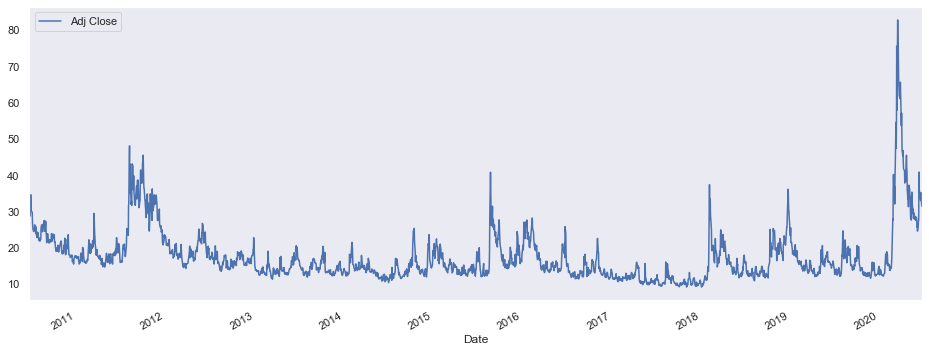

In [236]:
# Visualizing a line plot using vix and .plot() method 
vix_clean.plot(figsize = (16,6))

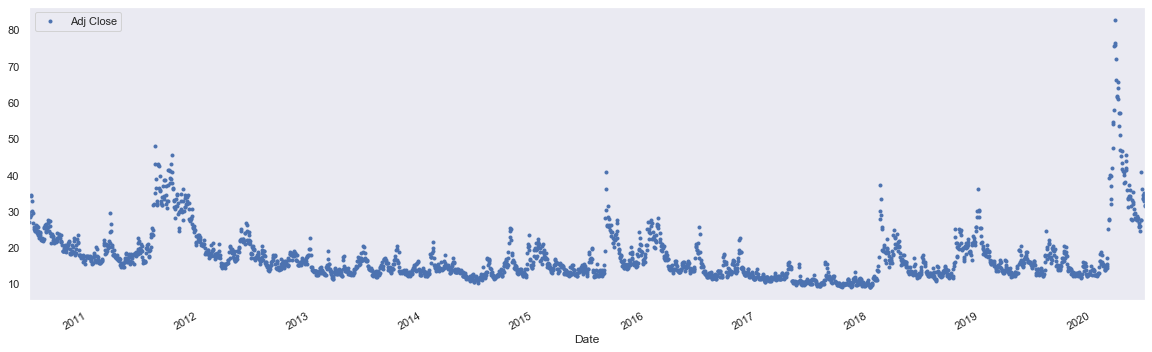

In [237]:
# Visualizing a dot plot using temp and .plot() method 
vix_clean.plot(figsize = (20,6), style = '.b');

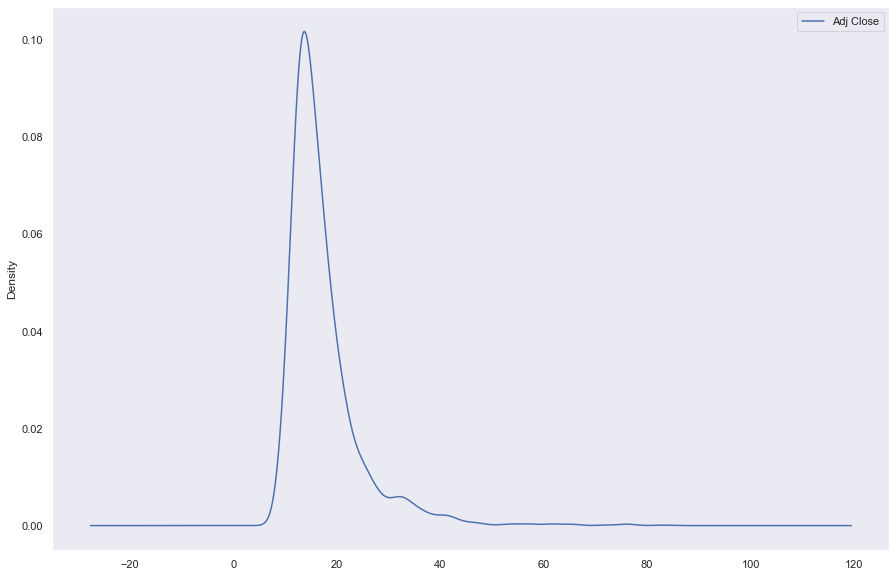

In [238]:
# Plot a density plot for dataset
vix_clean.plot(kind='kde', figsize = (15,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x13c61b590>]],
      dtype=object)

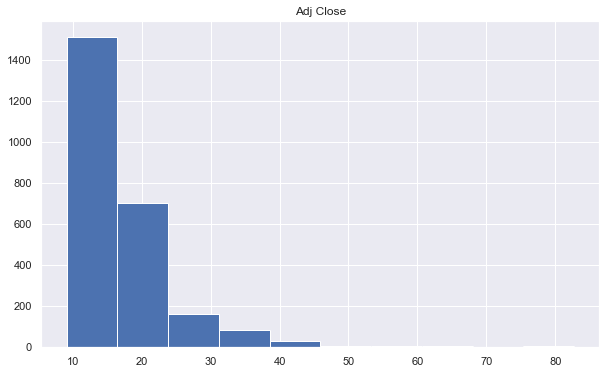

In [239]:
# Visualizing distribution of index values aka'fear levels' over the 10 years of data
vix_clean.hist(figsize = (10,6))

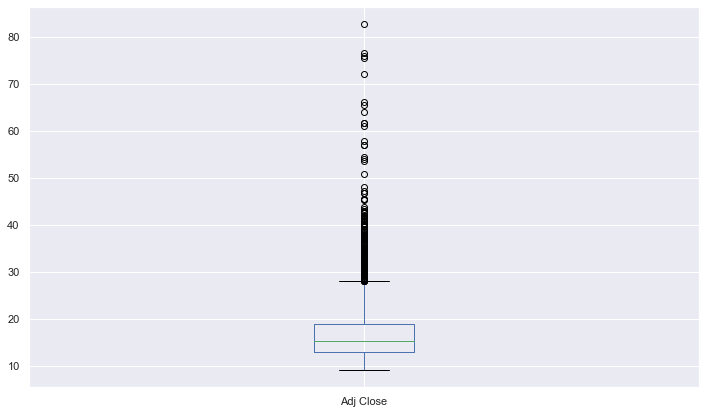

In [240]:
# Generate a box and whiskers plot for Vix
vix_clean.boxplot(figsize = (12,7));

### Clearly just looking at the graph tells us that the series is not stationary. Let us check for stationarity using a variety of statsmodel tests available for time series data ###

In [241]:
## Rolling statistics ##
roll_mean = vix_clean.rolling(window=8, center=False).mean()
roll_std = vix_clean.rolling(window=8, center=False).std()

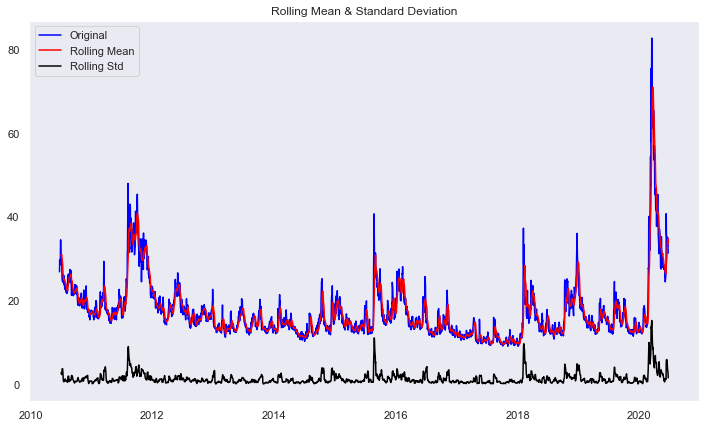

In [242]:
fig = plt.figure(figsize=(12,7))
plt.plot(vix_clean, color='blue', label='Original')
plt.plot(roll_mean, color='red', label='Rolling Mean')
plt.plot(roll_std, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

### The red and black lines represent the rolling mean and rolling standard deviations. You can see that the mean is not constant over time, so we can reconfirm our conclusion that the time series is not stationary based on rolling mean and rolling standard error. Lets try one test to complete our analysis###

In [243]:
vix_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2518 entries, 2010-06-23 to 2020-06-23
Data columns (total 1 columns):
Adj Close    2518 non-null float64
dtypes: float64(1)
memory usage: 39.3 KB


In [244]:
print("Results of Dickey-Fuller Test:")
dftest=adfuller(vix_clean)
dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)


Results of Dickey-Fuller Test:


ValueError: too many values to unpack (expected 2)

### Transforming Data to achieve Stationarity ###

In [220]:
vix_clean.head()

,Adj Close
Date,
2010-06-23,26.910000
2010-06-24,29.740000
2010-06-25,28.530001
2010-06-28,29.000000
2010-06-29,34.130001


In [199]:
vix_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2518 entries, 2010-06-23 to 2020-06-23
Data columns (total 1 columns):
Adj Close    2518 non-null float64
dtypes: float64(1)
memory usage: 39.3 KB


In [202]:
data = pd.Series(np.log(vix_clean))
fig = plt.figure(figsize=(12,6))
plt.plot(data, color='blue')
plt.xlabel('Year', fontsize=14)
plt.ylabel('log(adjclose)', fontsize=14)
plt.show()

ValueError: Wrong number of items passed 1, placement implies 2518